In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [8]:
data = pd.read_csv(r'C:\Users\80667\Desktop\文件\ИУ5\研一下\MMO\数据集\Highest Holywood Grossing Movies.csv')
data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [9]:
data.dtypes

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

# Устранение пропусков в данных

In [10]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['Release Date', 'License']

In [11]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('Release Date', 0.12854030501089325), ('License', 0.1895424836601307)]

In [12]:
data.shape

(918, 11)

In [13]:
data = data.dropna(axis=0, how='any')

In [14]:
data.isnull().sum()

Unnamed: 0                    0
Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
dtype: int64

In [15]:
data.shape

(744, 11)

# Кодирование категориальных признаков

## Кодирование категорий целочисленными значениями

In [17]:
date = LabelEncoder()
date_transform = date.fit_transform(data['Release Date'])

In [18]:
data['Release Date'].unique()

array(['December 16, 2015', 'April 24, 2019', 'December 16, 2009',
       'December 19, 1997', 'June 10, 2015', 'April 25, 2012',
       'December 13, 2017', 'July 11, 2019', 'July 16, 2008',
       'December 14, 2016', 'December 18, 2019', 'March 16, 2017',
       'November 20, 2019', 'May 19, 1999', 'May 25, 1977',
       'April 22, 2015', 'July 19, 2012', 'May 19, 2004', 'June 11, 1982',
       'June 20, 2019', 'March 6, 2019', 'November 15, 2013',
       'July 6, 2006', 'June 15, 1994', 'June 6, 2018', 'May 30, 2017',
       'April 24, 2013', 'April 27, 2016', 'March 8, 2012', 'May 3, 2002',
       'December 20, 2017', 'June 11, 1993', 'June 19, 2009',
       'November 22, 2013', 'June 28, 2019', 'April 25, 2017',
       'May 18, 2005', 'December 17, 2003', 'June 30, 2004',
       'February 25, 2004', 'June 24, 2016', 'June 20, 2013',
       'April 7, 2016', 'February 9, 2016', 'May 22, 2019',
       'April 1, 2015', 'June 29, 2011', 'December 25, 2014',
       'December 18, 2002',

In [19]:
np.unique(date_transform)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Нормализация числовых признаков

In [20]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

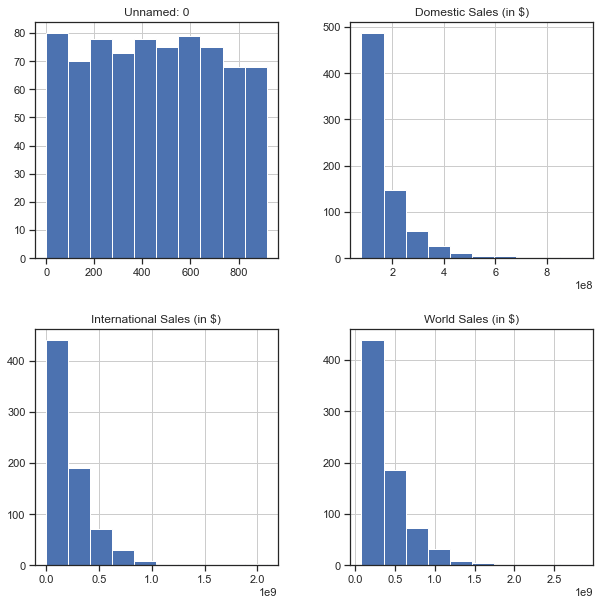

In [21]:
data.hist(figsize=(10,10))
plt.show()

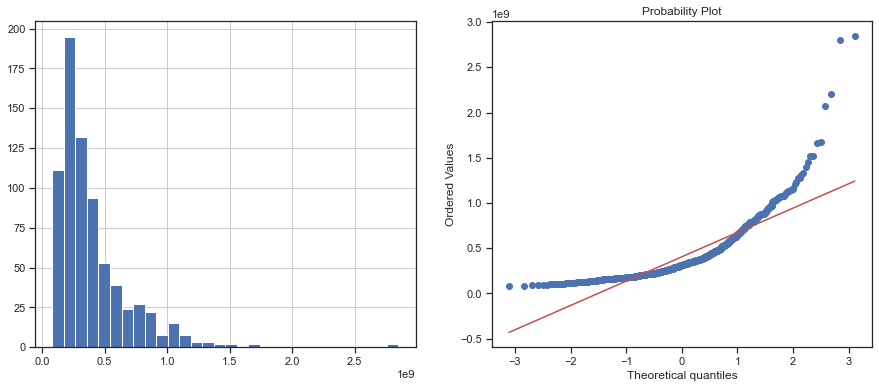

In [22]:
diagnostic_plots(data, 'World Sales (in $)')

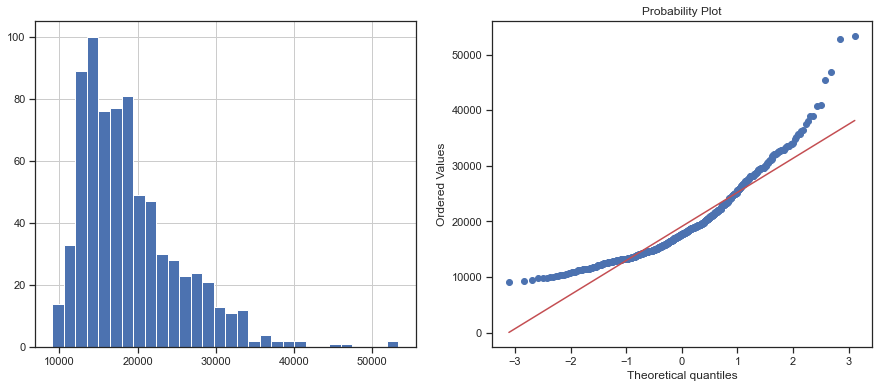

In [23]:
data['World Sales (in $)_sqr'] = data['World Sales (in $)']**(1/2) 
diagnostic_plots(data, 'World Sales (in $)_sqr')

Оптимальное значение λ = -0.30262887345630435


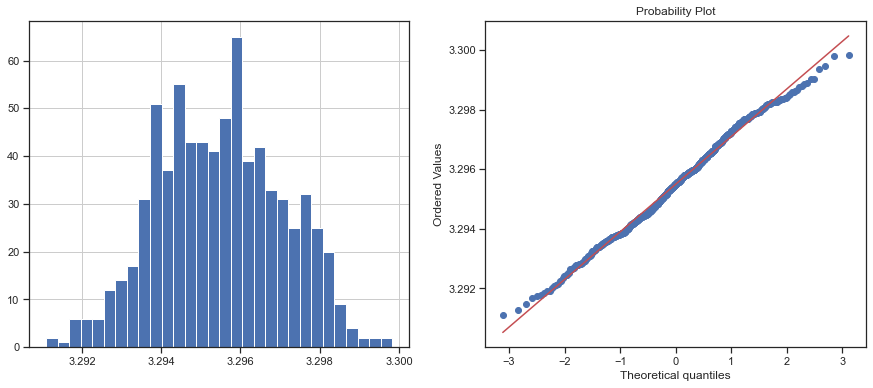

In [24]:
data['World Sales (in $)_boxcox'], param = stats.boxcox(data['World Sales (in $)']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'World Sales (in $)_boxcox')